In [73]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as sql

In [23]:
#conectar con la base de datos
db_connection = sql.connect(host='localhost', database='iot', user='root', password='8990')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM co2pm25')

In [24]:
#convertir de sql a dataframe
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)

In [25]:
muestra = 'Muestra'
fecha = 'Fecha'
co2 = 'PPM CO2'
pm25 = 'ug/ml PM2.5'

In [70]:
df.columns = [muestra,fecha,co2,pm25]

#Convertir columnas 2 y 3 de tipo object a int64
df[co2] = pd.to_numeric(df[co2])
df[pm25] = pd.to_numeric(df[pm25])

print(df)
df.info()

     Muestra               Fecha   PPM CO2  ug/ml PM2.5
0          1 2021-02-19 13:21:29  843.4495     15.78826
1          2 2021-02-19 13:22:29  749.1918     86.60873
2          3 2021-02-19 13:22:59  662.9549    240.27890
3          4 2021-02-19 13:23:29  547.6113     34.69557
4          5 2021-02-19 13:24:00  512.6740    103.55980
..       ...                 ...       ...          ...
497      498 2021-02-19 17:37:20  146.0646     85.71591
498      499 2021-02-19 17:37:50  146.0646    158.94610
499      500 2021-02-19 17:38:21  132.8217     91.50940
500      501 2021-02-19 17:38:52  160.2321     48.34917
501      502 2021-02-19 17:39:23  146.0646    107.45540

[502 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Muestra      502 non-null    int64         
 1   Fecha        502 non-null    datetime64[ns]
 2  

In [71]:
x = df[muestra] #lectura cada 30s
x2 = df[fecha] #fecha
y = df[co2] #CO2
y2 = df[pm25] #PM2.5
X = x[:,np.newaxis]

In [ ]:
regr = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()

In [29]:
#entrenar modelo, pasar datos de entrenamiento X,y
print(regr.fit(X,y))
print(regr2.fit(X,y2))

LinearRegression()
LinearRegression()


In [72]:
print(regr.coef_) 
m = regr.coef_[0]
b = regr.intercept_
print('y={0}*x+{1}'.format(m,b))
print(regr2.coef_) 
m2 = regr2.coef_[0]
b2 = regr2.intercept_
print('y={0}*x+{1}'.format(m2,b2))

[-0.34174518]
y=-0.3417451846845307*x+285.1642686294344
[-0.20225658]
y=-0.20225657511381367*x+194.10051055347475


In [31]:
#hacer una prediccion para evaluar el modelo
pred1 = regr.predict(X)
pred2 = regr2.predict(X)

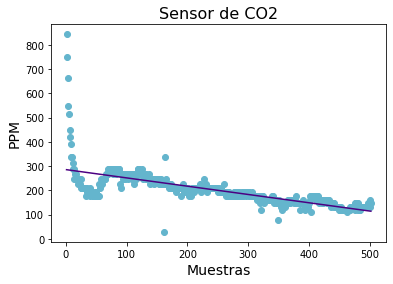

In [46]:
plt.scatter(x,y,color = 'c')
plt.plot(x,pred1,color = 'indigo')
plt.xlabel('Muestras', fontsize='14')
plt.ylabel('PPM', fontsize='14')
plt.title('Sensor de CO2', fontsize='16')
plt.show()

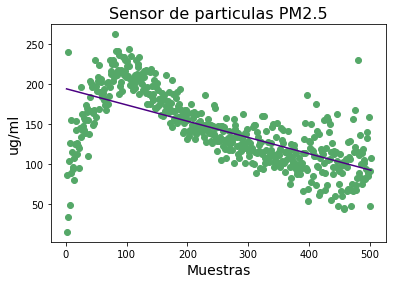

In [48]:
plt.scatter(x,y2,color = 'g')
plt.plot(x,pred2,color = 'indigo')
plt.xlabel('Muestras', fontsize='14')
plt.ylabel('ug/ml', fontsize='14')
plt.title('Sensor de particulas PM2.5', fontsize='16')
plt.show()

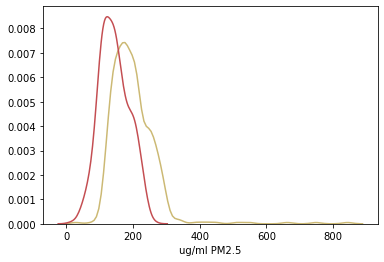

In [65]:
sns.distplot(df[co2],color="y",hist=False)
sns.distplot(df[pm25],color="r",hist=False)

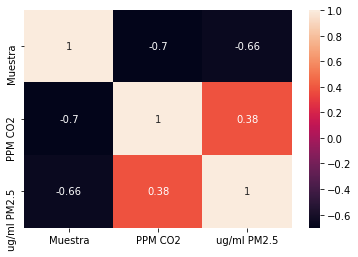

In [67]:
sns.heatmap(df.corr(),annot=True)